# Wie ein sinkendes Schiff
Auf der Suche nach dem perfekten Datenset sind mehrere Tage vergangen.
Wobei ich ein Datenset gesucht habe, welches sich gut klassifizieren lässt, einige neue Erkenntnisse hervorbringt und spaßig zu bearbeiten ist.
Das Titanic Datenset hat sich dafür sehr angeboten, auch wenn es schon viel bearbeitet wurde.
Dabei hat es mir leider etwas zu wenig soziale Relevanz oder Forschungscharakter.
Nachdem ich aber zwei Datensets bearbeitet habe, um später herauszufinden, dass sie komplett synthetisiert wurden (oft nicht auf den ersten blick erkennbar) und somit noch weniger Relevanz haben, bin ich doch zu diesem Datenset gekommen.
Der unfertige Stand des letzten Datensets lässt sich auf dem Git finden
## Der Datensatz
Auf Kaggle sind einige Titanic Datensätze zu finden, wie [dieser gut aufbereitete Datensatz](https://www.kaggle.com/datasets/yasserh/titanic-dataset). Dabei kann dieser Datensatz nur synthetisiert sein, da es mehr Passagierdaten gibt, als es auf der Titanic gab. Diesen Datensatz werde ich zum trainieren nutzen.

Zum Testen nutze ich [diesen Datensatz](https://www.kaggle.com/datasets/brendan45774/test-file).

### Mein Ziel mit diesem Datensatz
Ich möchte verschiedene Klassifier testen und mit diesen vorhersagen, ob ein Mensch auf der Titanic überlebt hätte.
# Exploratory Data Analysis (EDA)
In diesem Abschnitt möchte ich die Daten soweit aufbereiten und händisch analysieren, dass sich hypothesen ergeben, um mit ML Methoden weiter machen zu können.
## Imports und Laden des Datensets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette('colorblind'))

## Datenset in Google Colab laden
Die eine Möglichkeit in Google Colab daten zu laden ist per Drive
```python
from google.colab import drive

drive.mount('/content/drive')
df =pd.read_csv("drive/My Drive/ColabDrive/TitanicData/titanic.csv")
df.head()
```
Die andere Möglichkeit ist es direkt eine CSV Datei hochzuladen:
[Hier](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/download?datasetVersionNumber=2) der direkte Link zum Download der CSV Datei.
(Vorsicht: Die Datei muss gleich benannt sein)
```python
from google.colab import files
import io

try:
  uploaded = pd.read_csv('titanic.csv')
except:
  files.upload()
  uploaded = pd.read_csv('titanic.csv')
uploaded.head()
```
Ich habe mich aber für die Möglichkeit entschieden, Git zu nutzen, weil ich dort keine Rechte für meine Drive abgeben muss und keine manuelle Eingabe von Nöten ist.

In [25]:
try:
  test = pd.read_csv('MLHausarbeit/test.csv')
  df = pd.read_csv('MLHausarbeit/training.csv')
except:
  !git clone https://github.com/Arne-Berner/MLHausarbeit.git
  test = pd.read_csv('MLHausarbeit/test.csv')
  df = pd.read_csv('MLHausarbeit/training.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
dataset = pd.concat([df, test], ignore_index=True)
dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Spalten erklärt
Passenger ID - eine fortlaufende ID, welche bei 892 für das testset startet  
Survived - 0: nicht überlebt, 1: überlebt  
Pclass - 1: first class, 2: second class, 3: third class  
Name - Nachname, Titel Vorname  
Sex - Geschlecht  
Age - Alter  
SibSp - Anzahl an Geschwistern auf der Titanic  
Parch - Anzahl an Eltern/Kindern auf der Titanic  
Ticket - Ticketnummer  
Fare - Fahrpreis  
Cabin - Raumnummer   
Embarked - Wo an Board gegangen? S: Southhampton, C: Cork, Q: Queensland

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


Es ist gut zu erkennen, dass nicht alle Daten erhoben werden konnten. Sowohl beim Alter, als auch bei der Kabinennummer und dem Ticketpreis sind nullwerte zu erwarten. Die fehlenden Daten sind am besten

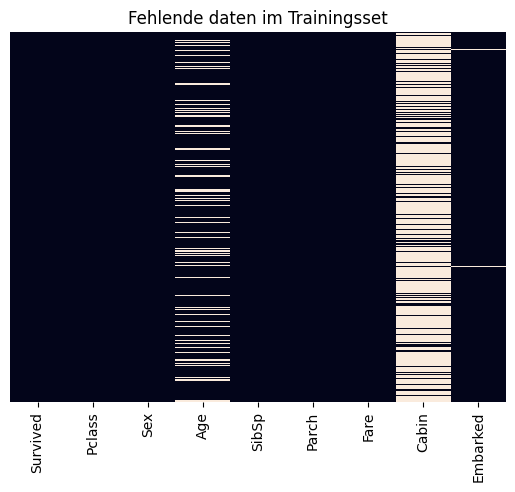

In [8]:
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False)
plt.title('Fehlende daten im Trainingsset')
plt.show()

Das Alter kann noch gut durch Fakewerte aufgefüllt werden, für die Cabins fehlen aber zu viele Daten. Deswegen sollten die Cabins in 1 für Cabin vorhanden und 0 für nicht vorhanden umgewandelt werden.

In [9]:
# change cabins to the above

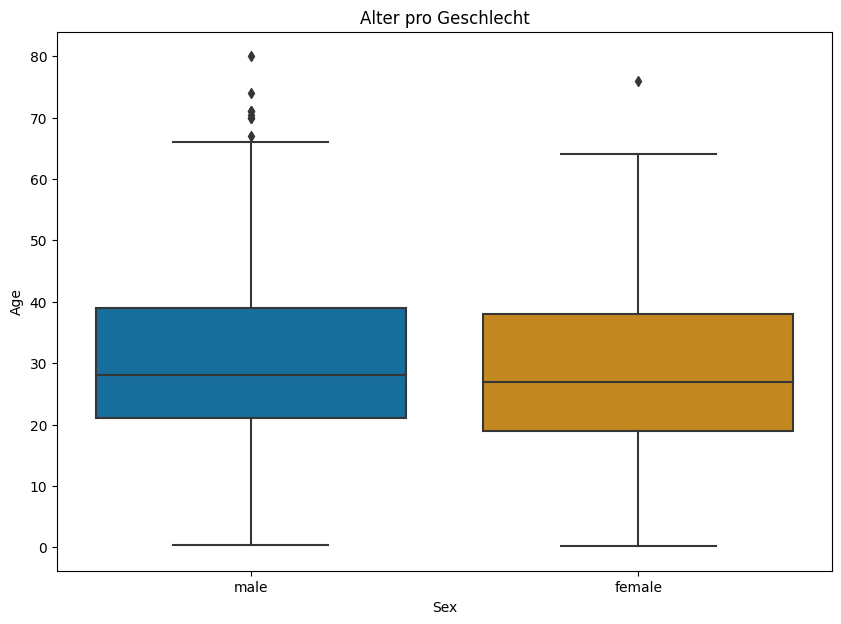

In [10]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Sex', y = 'Age', data = dataset).set_title('Alter pro Geschlecht')
plt.show()

Hier scheint es keine großen Differenzen zu geben. Es lohnt sich also nicht für männlich und weiblich verschiedene Alter anzugeben.

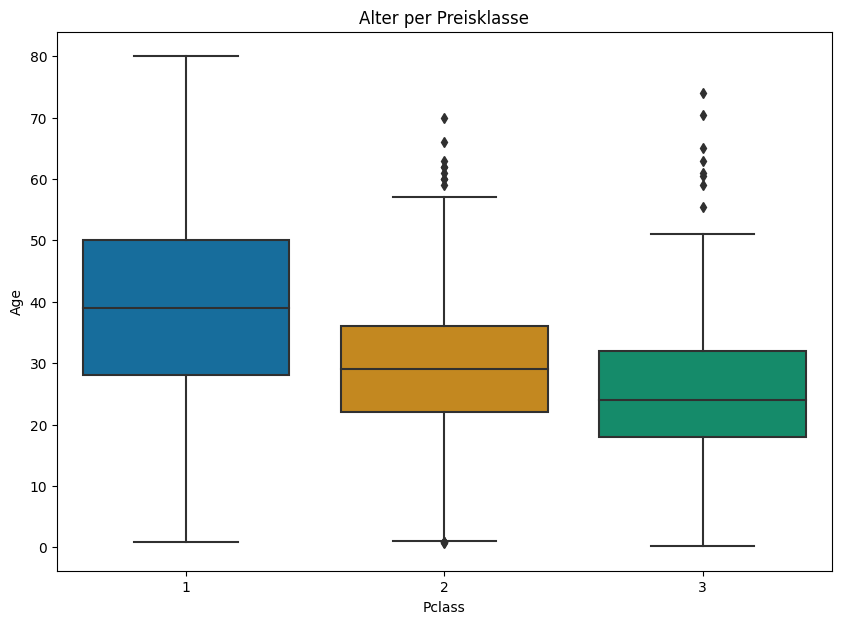

In [11]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = dataset).set_title('Alter per Preisklasse')
plt.show()

Die Unterschiede sind hier deutlich zu erkennen und es lohnt sich den jeweiligen Klassen andere Alterswerte zu geben.

In [12]:
# source: https://www.kaggle.com/code/zabihullah18/seaborn-tutorial
def impute_age(cols):
    age = cols[0]
    pClass = cols[1]

    if pd.isnull(age):

        if pClass == 1:
            return 37

        elif pClass == 2:

            return 29

        else:
            return 24

    else:
        return age

dataset['Age']=dataset[['Age','Pclass']].apply(impute_age, axis =1)

In [13]:
def impute_cabin(cols):
  cabin = cols[0]

  if pd.isnull(cabin):
    return 0
  return 1

dataset['Cabin']= dataset[['Cabin']].apply(impute_cabin, axis=1)

In [14]:
dataset.dropna(inplace=True)

Hier eine Übersicht mit den bisherigen Daten.

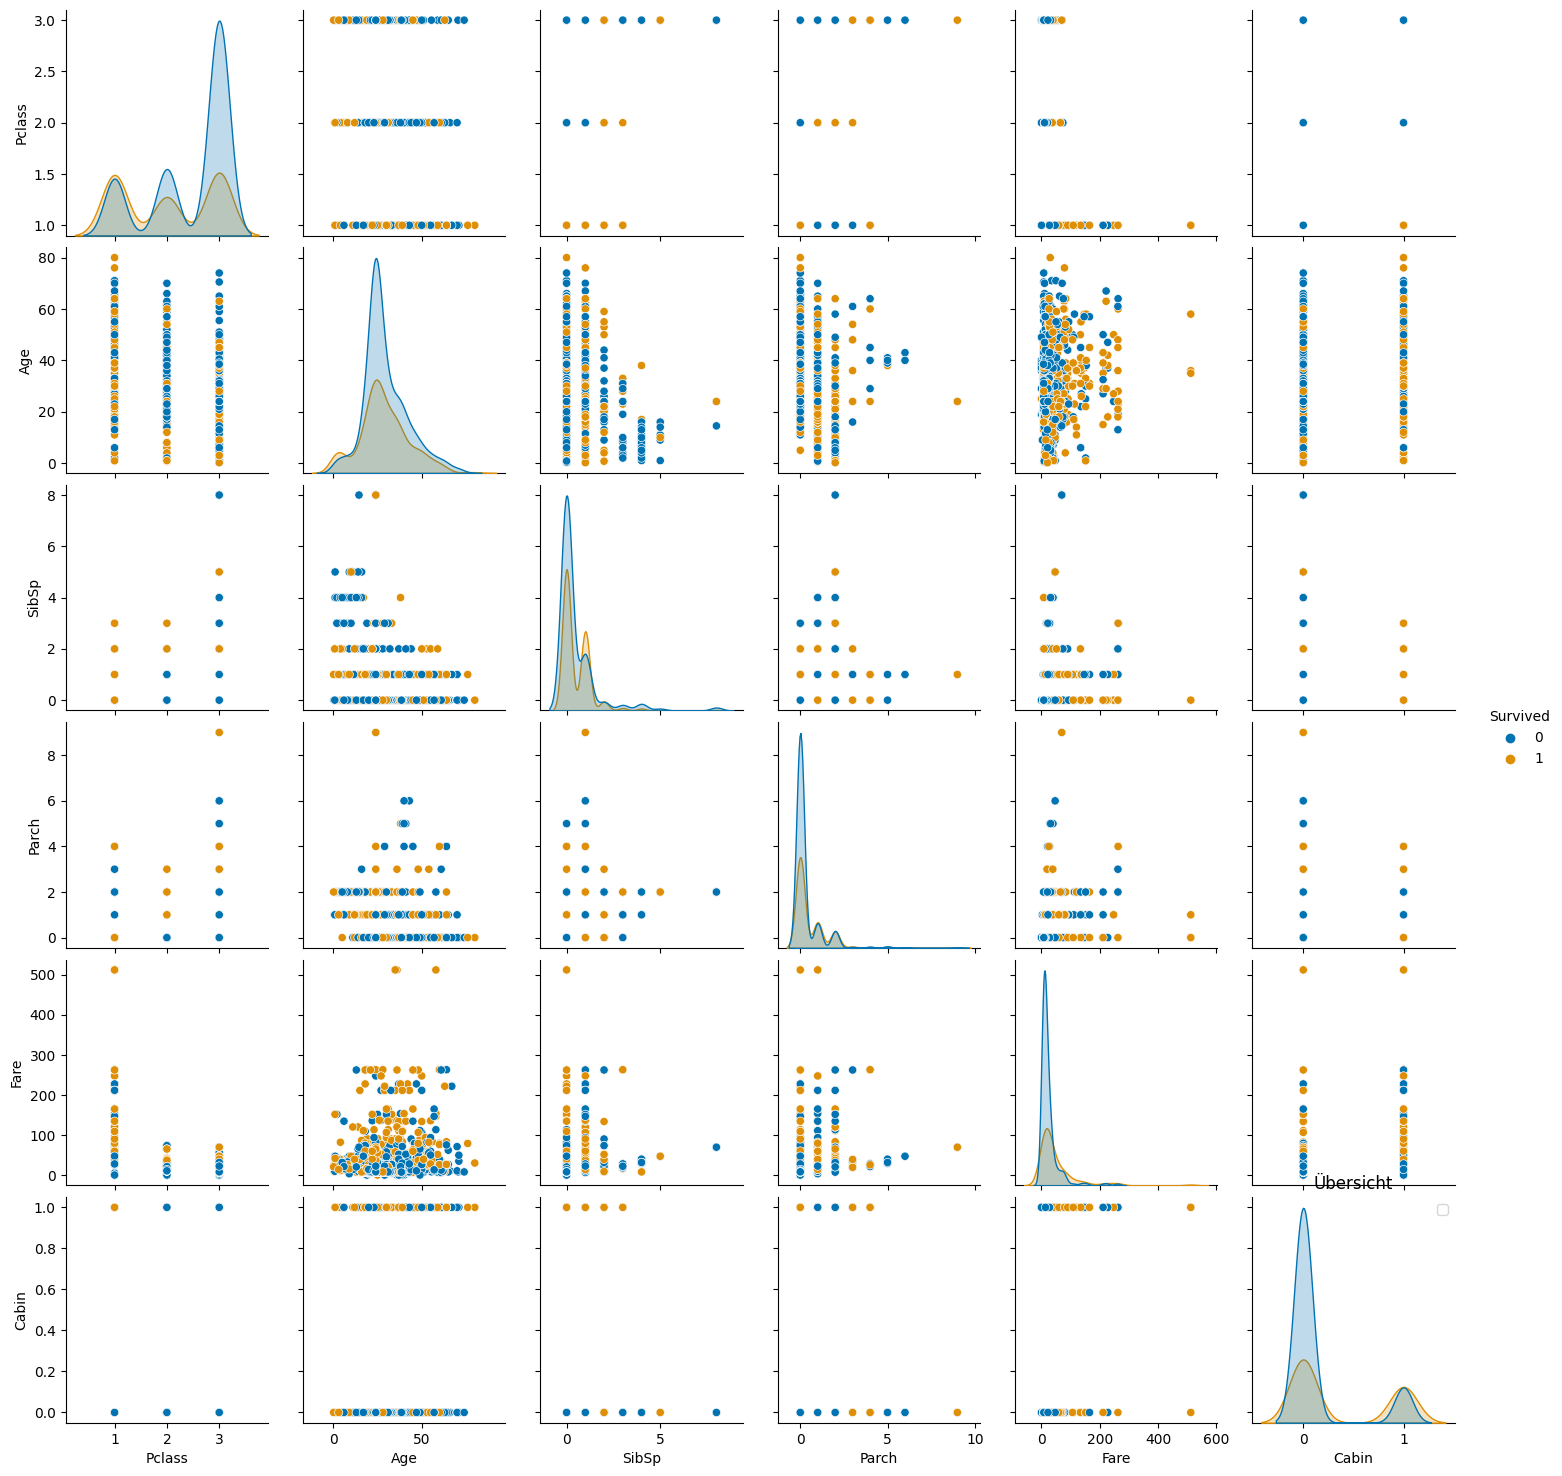

In [15]:
sns.pairplot(data=dataset, hue='Survived')
plt.title('Übersicht')
plt.legend()
plt.show()

In diesem kleinen Überblick ist schon eine Tendenz zu erkennen.
- Es überleben Leute in der ersten Klasse deutlich häufiger als in der dritten Klasse, damit zusammen hängend auch Menschen die mehr für das Ticket bezahlen
- jüngere Leute haben auch eine höhere Überlebenschance
- Menschen mit 1-3 Geschwistern auf der Titanic überlebten auch häufiger
- genauso Menschen mit ein bis zwei Kindern

Zahlen sind meist leichter zu verwerten, als Buchstaben, deswegen ändere ich alle leicht zu quantifizierenden Daten in Integer.

In [16]:
# source: https://www.kaggle.com/code/zabihullah18/seaborn-tutorial
def impute_sex(cols):
    sex = cols[0]

    if sex == 'male':
      return 0
    return 1

def impute_embarked(cols):
    embarked = cols[0]

    if embarked == 'S':
      return 0
    if embarked == 'C':
      return 1
    return 2


dataset['Sex']=dataset[['Sex']].apply(impute_sex, axis =1)
dataset['Embarked']=dataset[['Embarked']].apply(impute_embarked, axis =1)
dataset.head

<bound method NDFrame.head of       Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Cabin  Embarked
0            0       3    0  22.0      1      0    7.2500      0         0
1            1       1    1  38.0      1      0   71.2833      1         1
2            1       3    1  26.0      0      0    7.9250      0         0
3            1       1    1  35.0      1      0   53.1000      1         0
4            0       3    0  35.0      0      0    8.0500      0         0
...        ...     ...  ...   ...    ...    ...       ...    ...       ...
1304         0       3    0  24.0      0      0    8.0500      0         0
1305         1       1    1  39.0      0      0  108.9000      1         1
1306         0       3    0  38.5      0      0    7.2500      0         0
1307         0       3    0  24.0      0      0    8.0500      0         0
1308         0       3    0  24.0      1      1   22.3583      0         1

[1306 rows x 9 columns]>

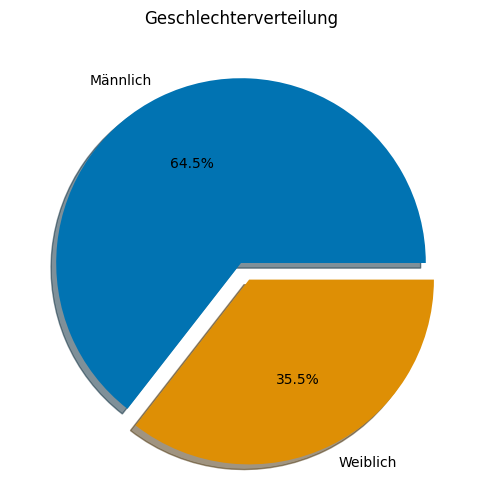

In [17]:
plt.figure(figsize=(6,6))
plt.pie(dataset['Sex'].value_counts(), labels=['Männlich', 'Weiblich'], autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.title('Geschlechterverteilung')
plt.show()

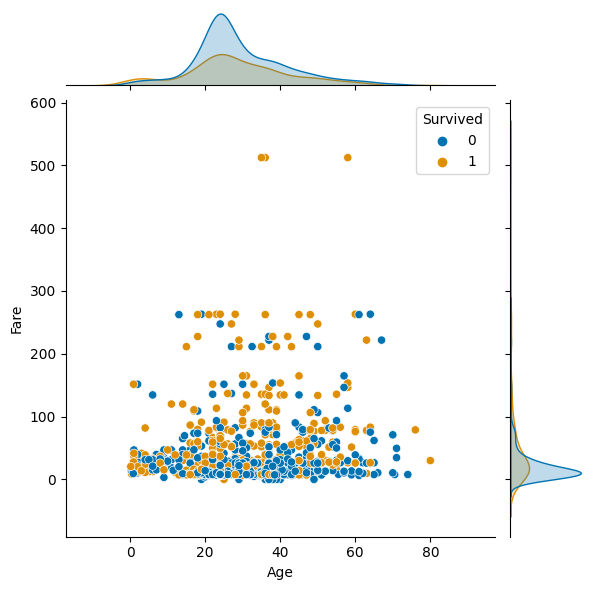

In [18]:
sns.jointplot(x="Age",y="Fare",data=dataset,hue="Survived")
plt.show()

In [19]:
dataset.max()

Survived      1.0000
Pclass        3.0000
Sex           1.0000
Age          80.0000
SibSp         8.0000
Parch         9.0000
Fare        512.3292
Cabin         1.0000
Embarked      2.0000
dtype: float64

In [20]:
dataset.min()

Survived    0.00
Pclass      1.00
Sex         0.00
Age         0.17
SibSp       0.00
Parch       0.00
Fare        0.00
Cabin       0.00
Embarked    0.00
dtype: float64

Etwas verwunderlich, ist dass einige so viel mehr, als andere Bezahlt haben.

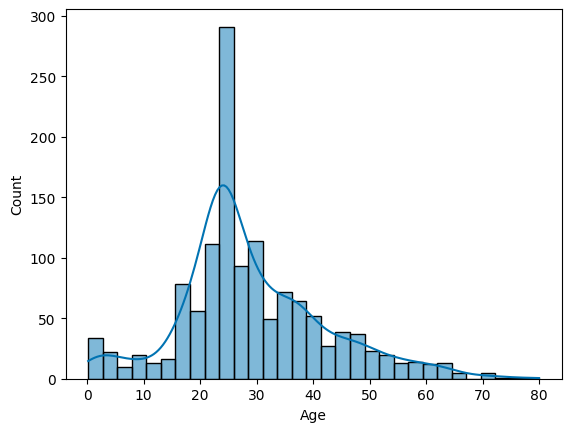

In [21]:
sns.histplot(dataset['Age'], kde=True)
plt.show()

Die meisten Passagiere sind zwischen 20 und 40 Jahre alt.

<ipython-input-22-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


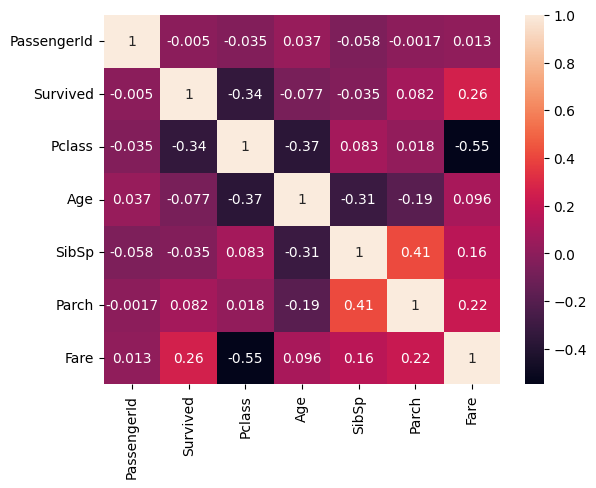

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Zusammen

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   int64  
 3   Age       1306 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Cabin     1306 non-null   int64  
 8   Embarked  1306 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 102.0 KB


# Trainieren
Zum Trainieren werde ich das Datenset wieder in zwei Teile splitten und den Ergebnis-Anteil vom Trainier-Anteil trennen.

In [28]:
splittingPoint = 890
training = dataset.iloc[:splittingPoint]
test = dataset.iloc[splittingPoint:]
X = training.drop('Survived', axis=1)
y = training['Survived']